# Prediction using Unsupervised ML

Task: Predict the optimum number of clusters and represent it visually

Submitted by: Ranita Ghosh

In [1]:
conda install seaborn

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
data_set=pd.read_csv("/Users/ranitaghosh/Desktop/lris.csv")
print("read the data successfully")

read the data successfully


In [12]:
data_set.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
data_set=data_set.drop('Id',axis=1)
data_set.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
data_set.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

[]

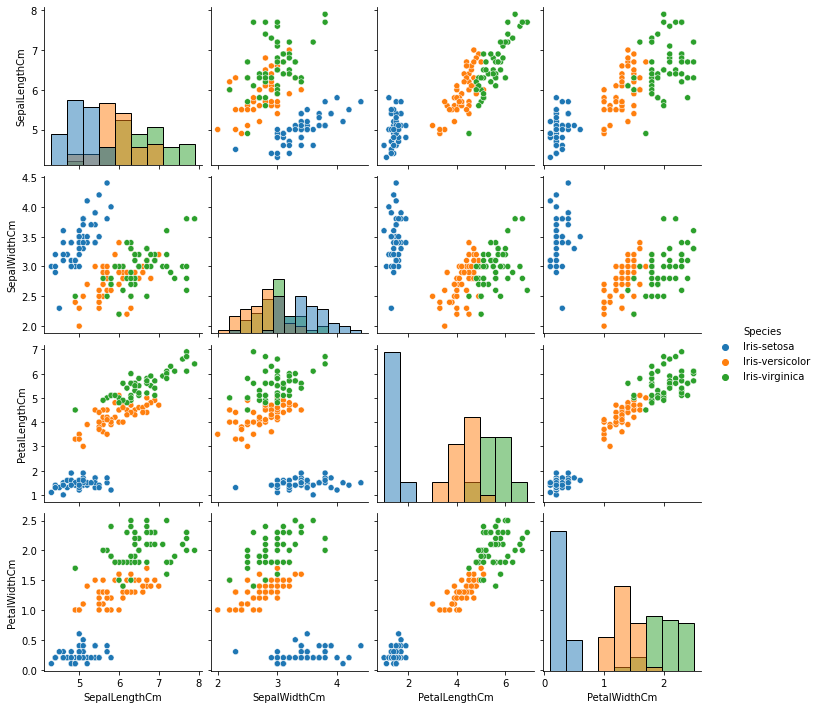

In [15]:
sns.pairplot(data_set,hue='Species',diag_kind='hist')
plt.plot()

[]

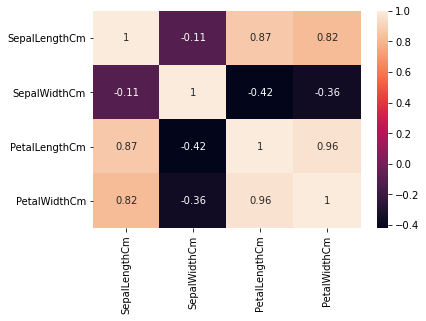

In [16]:
sns.heatmap(data_set.corr(),annot=True)
plt.plot()

In [24]:
x=data_set.iloc[:,[0,1,2,3]].values
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

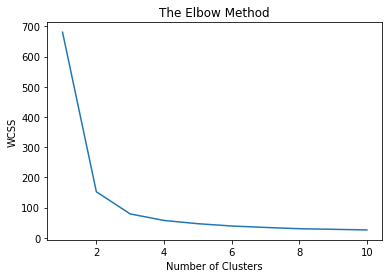

In [25]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel("WCSS")
plt.show()

In [34]:
kmeans=KMeans(n_clusters=3,init="k-means++",max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(x)

<function matplotlib.pyplot.show(close=None, block=None)>

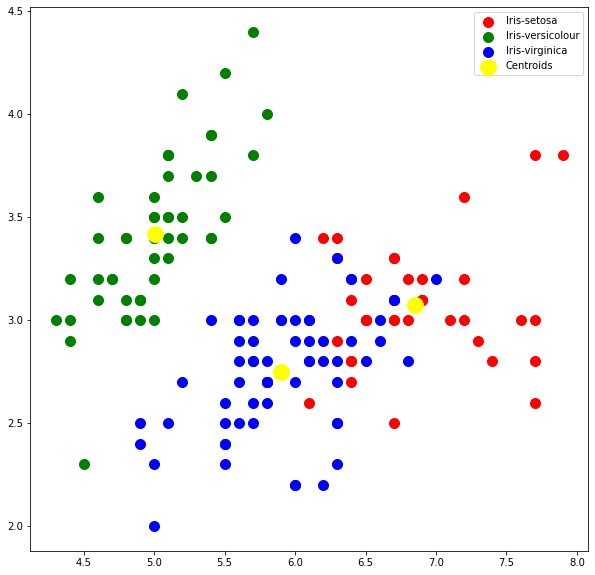

In [35]:
plt.rcParams["figure.figsize"]=10,10
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='red',label='lris-setosa')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='green',label='lris-versicolour')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='blue',label='lris-virginica')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=250,c='yellow',label='Centroids')
plt.legend()
plt.show

# Thanks for watching :)